<a href="https://colab.research.google.com/github/not-rdy/internship/blob/master/rec/features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) ФИО (name):**  
-

---

**2) !Возраст (age):**  
15-100 лет

---

**3) !Пол (sex):**  
М/Ж

---

**4) !Стоимость билета (price):**  

---

**5) ! Время в пути (time):**  

---

**6) ! Класс обслуживания (class):**  
люкс, СВ, купе, плацкарт

---

**7) ! Инвалидность (disability):**  
Да/Нет

---

**8) ! Льготная категория граждан (preferential):**  
 Да/нет

---

**9) ! Профессия (job):**

https://rosstat.gov.ru/folder/210/document/13211 + NA

---

**10) ! Родной город (city)**  
1) Топ 173 городов по численности

---

**11) ! Семейное положение (marital_status):**  
1) никогда не состаявшие в браке; 2) состоящие в браке; 3) вдовые;  
4) разведенные;  5) NA.

---

**12) ! Образование (education):**  
1) высшее, 2) неполное высшее, 3) среднее профессиональное, 4) среднее общее 
5) NA

---

**13) Отношение к курению (smoking):**  
1) Да; 2) Нет




In [1]:
! pip install python-docx

     |████████████████████████████████| 5.6 MB 24.4 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=b3b79fe5c3e24e1a5b82b122e1aaa1c750231338dba18f0362945c751ae25769
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from seaborn import jointplot
from docx import Document

In [3]:
# ФИО
df = pd.DataFrame( { 'name':np.repeat(None, 1000) } )

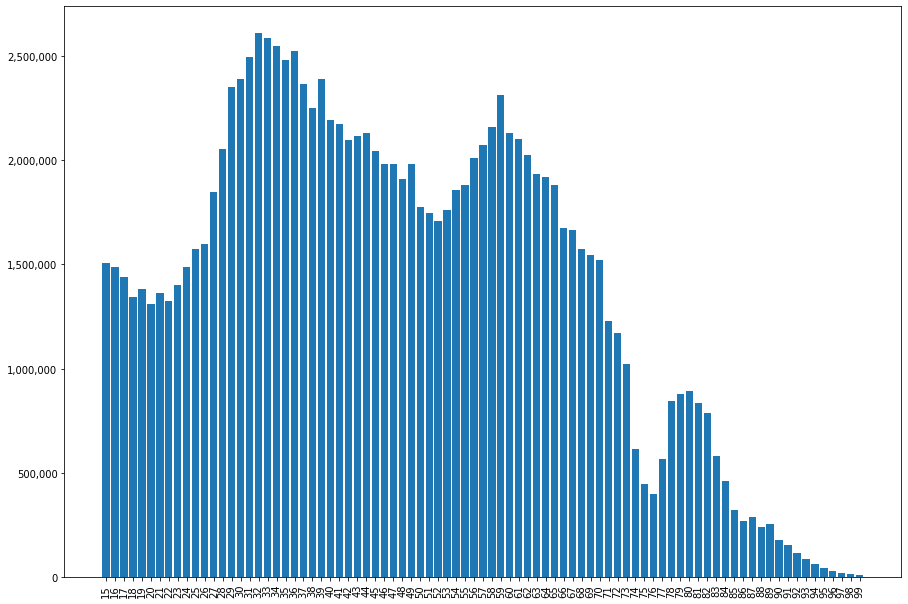

In [4]:
# возраст- распределение по населению РФ
age = pd.read_excel('/content/drive/MyDrive/features/age/popul_distr.xlsx')
age = age.drop(100)
age = age.iloc[15:, :]

fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax.bar(age['age'], age['count'])
plt.xticks(rotation = 90)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [5]:
# возраст - генерим подобное распределение
probs = list( map(lambda x: x/sum(age['count']), age['count']) ) # вероятности для каждого возраста

np.random.seed(14)
age_list = np.random.choice( np.arange(15, 100), p = probs, size = 1000)
df['age'] = age_list

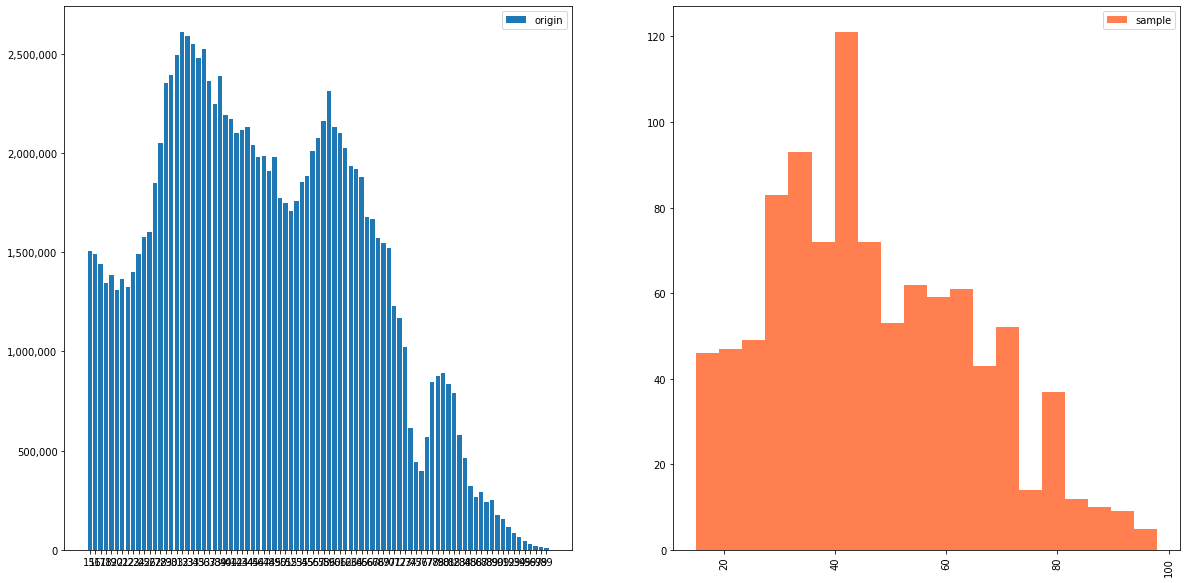

In [6]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

ax[0].bar(age['age'], age['count'], label = 'origin')
plt.xticks(rotation = 90)
ax[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].legend()

ax[1].hist(age_list, bins = 20, label = 'sample', color = 'coral')
ax[1].legend()

In [34]:
# Пол
np.random.seed(14)
df = df.sample(frac=1).reset_index(drop = True)
df['sex'] = np.random.choice( ['М', 'Ж'], p = [46.4/100, 53.6/100], size=1000)

df['sex'].value_counts()

Ж    550
М    450
Name: sex, dtype: int64

corr: 0.8081277237490332 

                  0         1
count      1000.000  1000.000
mean  182059424.783  6581.138
std    51441842.333  1681.171
min    17184823.291  1200.492
25%   147724212.399  5472.850
50%   182635367.394  6597.734
75%   215597450.715  7712.071
max   339421776.882 12665.091 

L: 
 [[7172.29686591    0.        ]
 [   0.18125295   23.47763352]] 


           price     time
count  1000.000 1000.000
mean  18205.941   65.815
std    5144.188   16.813
min    1718.000   12.000
25%   14772.500   55.000
50%   18263.500   66.000
75%   21559.500   77.000
max   33942.000  127.000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


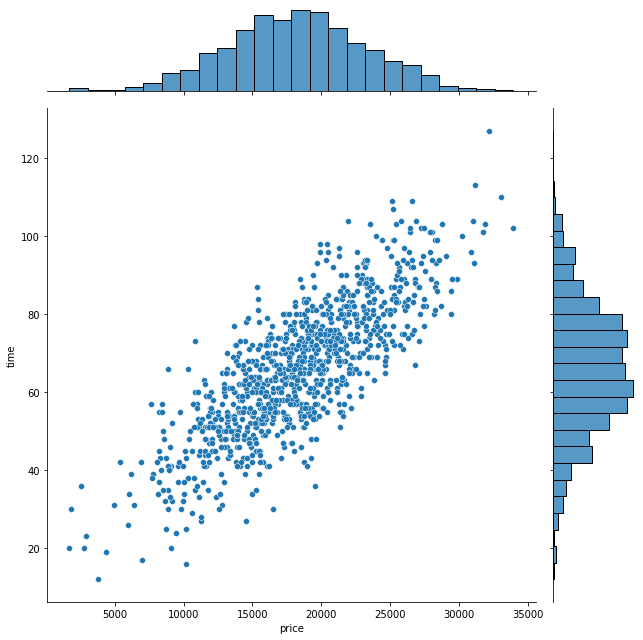

In [8]:
# Стоимость билета и время в пути (из нормального распределения, с корреляцией 0.8)

# стоимость
np.set_printoptions(suppress=True)

np.random.seed(14)
price = np.random.normal(np.mean(range(2000, 50001)), 7000, size=1000)
df['price'] = price
df['price'] = round(df['price'])


# время в пути
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.random.seed(10)
df['time'] = list(np.random.normal(85, 45, 1000))
df['time'] = round(df['time'])

# ковариационная матрица (price, time)
cov = 1300
C = [ [51441842.332731776, cov], [cov, 551.2321281281286] ]

# раскладываем
L = np.linalg.cholesky(C)

# перемножаем на исходные векторы price и time
price_time = L @ [df['price'], df['time']]
t = pd.DataFrame(price_time)
t = t.T
print('corr:', t.iloc[:, 0].corr(t.iloc[:, 1]), '\n')
print(t.describe(), '\n')
print('L:', '\n', L, '\n')

df = df.sample(frac=1).reset_index(drop=True)
df['price'] = round(t.iloc[:, 0] / 10000)
df['time'] = round(t.iloc[:, 1] / 100)
print('\n', df.iloc[:, 3:5].describe())


jointplot(df['price'], df['time'], height=9)


In [33]:
# Класс обслуживания
np.random.seed(14)
df['classes'] = np.repeat(None, 1000)
classes = np.random.choice(['люкс', 'СВ', 'купе', 'плацкарт'], p=[0.01, 0.05, 0.54, 0.40], size=1000)

df['p/t'] = df['price']/df['time']
df = df.sort_values(by='p/t', ignore_index=True)
df.iloc[988:1000, 5] = 'люкс'
df.iloc[953:988, 5] = 'СВ'
df.iloc[577:953, 5] = 'купе'
df.iloc[0:577, 5] = 'плацкарт'

df = df.drop('p/t', axis=1)
df = df.sample(frac=1).reset_index(drop=True)

df['classes'].value_counts()

плацкарт    577
купе        376
СВ           35
люкс         12
Name: classes, dtype: int64

In [32]:
# Инвалидность
p = 11633 / 146171
np.random.seed(14)
inval = np.random.choice(['Да', 'Нет'], p=[p, 1-p], size=1000)
df = df.sample(frac = 1).reset_index(drop = True)
df['disability'] = inval

df['disability'].value_counts()

Нет    933
Да      67
Name: disability, dtype: int64

In [31]:
# Льготная категория граждан
np.random.seed(12)
p = 0.05
preferential = np.random.choice(['Да', 'Нет'], p=[p, 1-p], size=401)
df['preferential'] = np.repeat('Нет', 1000)
df.loc[df[df['age'] >= 50].index, 'preferential'] = preferential

df['preferential'].value_counts()

Нет    978
Да      22
Name: preferential, dtype: int64

In [12]:
# Профессия (количественное распределение профессий по возрастным группам)
df['job'] = np.repeat('NA', 1000)

document = Document('/content/drive/MyDrive/features/job/!R-2.docx')

tables = []
for table in document.tables:
    tab = [['' for i in range(len(table.columns))] for j in range(len(table.rows))]
    for i, row in enumerate(table.rows):
        for j, cell in enumerate(row.cells):
            if cell.text:
                tab[i][j] = cell.text
    tables.append(pd.DataFrame(tab))

job2_1 = tables[0]
job2_2 = tables[1]

job2_1 = job2_1.drop(0).reset_index(drop=True)
job2_2 = job2_2.drop(0).reset_index(drop=True)

job2_1.columns = job2_1.iloc[0, :]
job2_2.columns = job2_2.iloc[0, :]

job2_1 = job2_1.drop(0).reset_index(drop=True)
job2_2 = job2_2.drop(0).reset_index(drop=True)

jobs = pd.concat([job2_1, job2_2], axis=0, ignore_index=True)
jobs = jobs.drop('Средний\nвозраст, лет', axis = 1)
jobs = jobs.drop([0, 1, 2, 9, 15, 20, 25, 26, 32, 36]).reset_index(drop=True)

for i in range(len(jobs)):
    jobs.iloc[i, 0] = jobs.iloc[i, 0].replace('\n', '')

jobs.columns = [ i.replace('\n', '') for i in jobs.columns ]

for i in range(len(jobs)):
    for z in range(1, 9):
        jobs.iloc[i, z] = jobs.iloc[i, z].replace(',', '.')

for i in  range(1, 9):
    jobs.iloc[:, i] = pd.to_numeric(jobs.iloc[:, i])

jobs.head()

,,"Всего,тыс.человек",15-19,20-29,30-39,40-49,50-59,60-69,70 и старше
0,Специалисты в области науки и техники,3205,1.000,561,990,766,666,207,14.000
1,Специалисты в области здравоохранения,1606,0.000,217,392,457,403,122,15.000
2,Специалисты в области образования,4363,5.000,669,1125,1187,1024,318,35.000
3,Специалисты в сфере бизнеса и администрирования,4867,4.000,1114,1826,1148,650,121,4.000
4,Специалисты по информационно-коммуникационным ...,986,2.000,346,404,165,59,9,0.400


In [14]:
# Вероятностное распределение профессий по возрастным группам
jobs_probs = jobs.copy()

for i in range(len(jobs_probs)):
    for z in range(2, 9):
        jobs_probs.iloc[i, z] = jobs_probs.iloc[i, z] / jobs_probs['Всего,тыс.человек'].sum()

jobs_probs.head()

,,"Всего,тыс.человек",15-19,20-29,30-39,40-49,50-59,60-69,70 и старше
0,Специалисты в области науки и техники,3205,0.000,0.009,0.015,0.012,0.010,0.003,0.000
1,Специалисты в области здравоохранения,1606,0.000,0.003,0.006,0.007,0.006,0.002,0.000
2,Специалисты в области образования,4363,0.000,0.010,0.017,0.018,0.016,0.005,0.001
3,Специалисты в сфере бизнеса и администрирования,4867,0.000,0.017,0.028,0.017,0.010,0.002,0.000
4,Специалисты по информационно-коммуникационным ...,986,0.000,0.005,0.006,0.003,0.001,0.000,0.000


In [15]:
def fun(job_list, age1, age2):
    col = str(age1)+str('-')+str(age2)
    prob_list = [i for i in jobs_probs[col]]
    prob_list.append(1 - jobs_probs[col].sum())
    size = len(df[ (df['age'] >= age1) & (df['age'] <= age2) ])

    np.random.seed(14)
    sample = np.random.choice(job_list, p=prob_list, size=size)
    df.loc[ df[(df['age'] >= age1) & (df['age'] <= age2)].index, 'job' ] = sample

job_list = [ i for i in jobs_probs[''] ]
job_list.append('NA')

# группа 15-19
fun(job_list, 15, 19)

# группа 20-29
fun(job_list, 20, 29)

# группа 30-39
fun(job_list, 30, 39)

# группа 40-49
fun(job_list, 40, 49)

# группа 50-59
fun(job_list, 50, 59)

# группа 60-69
fun(job_list, 60, 69)

# группа 70-98
prob_list_70_98 = [i for i in jobs_probs['70 и старше']]
prob_list_70_98.append(1 - jobs_probs['70 и старше'].sum())

size_70_98 = len(df[ (df['age'] >= 70) & (df['age'] <= 98) ])

np.random.seed(14)
sample_70_98 = np.random.choice(job_list, p=prob_list_70_98, size=size_70_98)
df.loc[ df[(df['age'] >= 70) & (df['age'] <= 98)].index, 'job' ] = sample_70_98

df['job'].value_counts()

NA                                                                                                                                     815
Водители и операторы подвижного оборудования                                                                                            27
Рабочие, занятые в металлообрабатывающем и машиностроительном производстве, механики и ремонтники                                       19
Специалисты в области науки и техники                                                                                                   13
Средний специальный персонал по экономической и административной деятельности                                                           11
Специалисты-техники в области науки и техники                                                                                           11
Специалисты в области права, гуманитарных областей и культуры                                                                           10
Продавцы                   

In [30]:
# Родной город
city_count = pd.read_excel('/content/drive/MyDrive/features/city/city.xlsx')
city_list = [ i for i in city_count['Город'] ]
city_probs = [ i/city_count['на 1 января 2020 года'].sum() for i in city_count['на 1 января 2020 года'] ]

np.random.seed(14)
df = df.sample(frac=1).reset_index(drop=True)
df['city'] = np.random.choice(city_list, p=city_probs, size=1000)

df['city'].value_counts()

г. Москва             158
г. Санкт-Петербург     67
г. Челябинск           23
г. Екатеринбург        20
г. Краснодар           18
                     ... 
г. Нефтеюганск          1
г. Домодедово           1
г. Долгопрудный         1
г. Кисловодск           1
г. Южно-Сахалинск       1
Name: city, Length: 161, dtype: int64

In [17]:
# Количественное распределение семейного положения по возрастным группам
df['marit_status'] = np.repeat('NA', 1000)

marital = pd.read_excel('/content/drive/MyDrive/features/marital_status/marital_status.xlsx')
marital

,Unnamed: 0,женщины никогда не сос- тоявшие в браке,женщины состо-ящие в браке,женщины вдовые,Женщины раз- веденные и разошед- шиеся,мужчины никогда не сос- тояв- шие в браке,мужчины состо-ящие в браке,мужчины вдовые,мужчины раз- веденные и разо- шед- шие ся
0,16 – 19,922,75,0,3,982,17,0,1
1,20 – 24,572,391,2,35,775,213,0,12
2,25 – 29,263,639,7,91,403,544,1,52
3,30 – 34,147,699,16,138,211,690,3,96
4,35 – 39,96,702,29,173,130,745,5,120
5,40 – 44,66,694,51,189,82,778,10,130
6,45 – 49,51,685,81,183,61,799,17,123
7,50 – 54,42,657,129,172,45,817,28,110
8,55 – 59,40,597,203,160,34,826,44,96
9,60 – 64,37,521,305,137,24,826,73,77


In [18]:
# Вероятностное распределение
marital_probs = marital.copy()

for i in range(0, 12):
    for z in range(1, 5):
        marital_probs.iloc[i, z] = marital_probs.iloc[i, z]/marital.iloc[i, 1:5].sum()

for i in range(0, 12):
    for z in range(5, 9):
        marital_probs.iloc[i, z] = marital_probs.iloc[i, z]/marital.iloc[i, 5:9].sum()

for i in range(0, 12):
    marital_probs.iloc[i, 0] = marital_probs.iloc[i, 0].replace(' – ', '-')

marital_probs


,Unnamed: 0,женщины никогда не сос- тоявшие в браке,женщины состо-ящие в браке,женщины вдовые,Женщины раз- веденные и разошед- шиеся,мужчины никогда не сос- тояв- шие в браке,мужчины состо-ящие в браке,мужчины вдовые,мужчины раз- веденные и разо- шед- шие ся
0,16-19,0.922,0.075,0.000,0.003,0.982,0.017,0.000,0.001
1,20-24,0.572,0.391,0.002,0.035,0.775,0.213,0.000,0.012
2,25-29,0.263,0.639,0.007,0.091,0.403,0.544,0.001,0.052
3,30-34,0.147,0.699,0.016,0.138,0.211,0.690,0.003,0.096
4,35-39,0.096,0.702,0.029,0.173,0.130,0.745,0.005,0.120
5,40-44,0.066,0.694,0.051,0.189,0.082,0.778,0.010,0.130
6,45-49,0.051,0.685,0.081,0.183,0.061,0.799,0.017,0.123
7,50-54,0.042,0.657,0.129,0.172,0.045,0.817,0.028,0.110
8,55-59,0.040,0.597,0.203,0.160,0.034,0.826,0.044,0.096
9,60-64,0.037,0.521,0.305,0.137,0.024,0.826,0.073,0.077


In [19]:
def fun2(status_list_w, status_list_m, prob_list_w, prob_list_m, age1, age2):
    np.random.seed(13)
    df_sample = df.sample(frac=0.3)
    
    sample_w = np.random.choice(status_list_w, p=prob_list_w, size=len(df.loc[df_sample.index, 'marit_status'][(df['age'] >= age1) & (df['age'] <= age2) & (df['sex'] == 'Ж')]))
    sample_m = np.random.choice(status_list_m, p=prob_list_m, size=len(df.loc[df_sample.index, 'marit_status'][(df['age'] >= age1) & (df['age'] <= age2) & (df['sex'] == 'М')]))
    
    index_w = df.loc[df_sample.index, 'marit_status'][(df['age'] >= age1) & (df['age'] <= age2) & (df['sex'] == 'Ж')].index
    index_m = df.loc[df_sample.index, 'marit_status'][(df['age'] >= age1) & (df['age'] <= age2) & (df['sex'] == 'М')].index

    df.loc[index_w, 'marit_status'] = sample_w
    df.loc[index_m, 'marit_status'] = sample_m


status_list_woman = ['не состояла в браке', 'в браке', 'вдова', 'разведена']
status_list_man = ['не состоял в браке', 'в браке', 'вдовец', 'разведен']

for i in range(0, 11):
    prob_list_w = [i for i in marital_probs.iloc[i, 1:5]]
    prob_list_m = [i for i in marital_probs.iloc[i, 5:9]]
    age = marital_probs['Unnamed: 0'][i].split('-')
    fun2(status_list_woman, status_list_man, prob_list_w, prob_list_m, int(age[0]), int(age[1]))

# группа 70 и более
np.random.seed(13)
df_sample = df.sample(frac=0.3)

prob_list_w = [i for i in marital_probs.iloc[11, 1:5]]
prob_list_m = [i for i in marital_probs.iloc[11, 5:9]]

size_w=len(df.loc[df_sample.index, 'marit_status'][(df['age'] >= 70) & (df['sex'] == 'Ж')])
size_m=len(df.loc[df_sample.index, 'marit_status'][(df['age'] >= 70) & (df['sex'] == 'М')])

sample_w = np.random.choice(status_list_woman, p=prob_list_w, size=size_w)
sample_m = np.random.choice(status_list_man, p=prob_list_m, size=size_m)
    
index_w = df.loc[df_sample.index, 'marit_status'][(df['age'] >= 70) & (df['sex'] == 'Ж')].index
index_m = df.loc[df_sample.index, 'marit_status'][(df['age'] >= 70) & (df['sex'] == 'М')].index

df.loc[index_w, 'marit_status'] = sample_w
df.loc[index_m, 'marit_status'] = sample_m

df['marit_status'].value_counts()

NA                     703
в браке                188
не состояла в браке     35
не состоял в браке      25
разведена               19
вдова                   14
разведен                10
вдовец                   6
Name: marit_status, dtype: int64

In [40]:
# Образование
df['education'] = np.repeat('NA', 1000)

education_list = ['высшее', 'неполное высшее', 'среднее профессиональное', 'среднее общее']
probs_education = [304/942, 21/942, (347+102)/942, 168/942]

np.random.seed(14)
size = len(df[df['age'] >= 20].sample(frac=0.4))

education = np.random.choice(education_list, p=probs_education, size=size)

sample_index = df[df['age'] >= 20].sample(frac=0.4).index
df.loc[sample_index, 'education'] = education

df['education'].value_counts()

NA                          618
среднее профессиональное    187
высшее                      119
среднее общее                72
неполное высшее               4
Name: education, dtype: int64

In [42]:
# Отношение к курению
df['smoking'] = np.repeat('NA', 1000)

smok_distrib = pd.read_excel('/content/drive/MyDrive/features/smoking/smok.xlsx')
smok_distrib

,0,15-19,20-24,25-29,30-39,40-49,50-59,60 и более
0,Да,11,32.300,36.300,37.200,38,29.800,14.100
1,Нет,89,67.700,63.700,62.800,62,70.200,85.900


In [59]:
for i in range(1, 8):
    col = smok_distrib.columns[i]
    if i < 7:
        age1 = int(col.split('-')[0])
        age2 = int(col.split('-')[1])
        np.random.seed(14)
        df_sample = df.sample(frac=0.3)
        df_subsample = df_sample[(df_sample['age'] >= age1)&(df_sample['age'] <= age2)]
        size = len(df_subsample)
        index = df_subsample.index
        sample = np.random.choice(['Да', 'Нет'], p=smok_distrib[col]/100, size=size)
        df.loc[index, 'smoking'] = sample
    else:
        np.random.seed(14)
        df_sample = df.sample(frac=0.3)
        df_subsample = df_sample[df_sample['age'] >= 60]
        size = len(df_subsample)
        index = df_subsample.index
        sample = np.random.choice(['Да', 'Нет'], p=smok_distrib['60 и более']/100, size=size)
        df.loc[index, 'smoking'] = sample

df['smoking'].value_counts()

NA     700
Нет    228
Да      72
Name: smoking, dtype: int64